# PROYECTO FINAL MODULO 5: ENTRENAMIENTO DE MODELO DE MACHINE LEARNING PARA DETERMINAR SI UN PACIENTE SUFRE DE ANEMIA

## FUENTE : [DATOS ABIERTOS](https://www.datosabiertos.gob.pe/dataset/morbilidad-anemia)

Nombre: Javier Chacnama Quispe

In [2]:
!pip install pyjanitor
import janitor

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 215.4/215.4 kB 5.9 MB/s eta 0:00:00


In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#1. CARGAR DATASET

In [4]:
DATASET_PATH = 'https://github.com/JavierChQ/datasets/raw/refs/heads/main/TB_ANEMIA.csv'
df_anemia = pd.read_csv(DATASET_PATH,sep = ";")
df_anemia.head(10)

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
0,40971314,2,A,M,NaN,20230522,D649,D,6203
1,39270343,4,A,M,1128.0,20211122,D509,D,10836
2,39270343,4,A,M,1128.0,20211129,D509,D,10836
3,39155787,3,A,F,1128.0,20210527,D509,D,10836
4,36178995,2,A,F,1299.0,20210215,D509,D,6079
5,38926264,4,A,M,1506.0,20211113,D509,D,7475
6,39141175,1,A,M,1128.0,20210220,D509,D,6856
7,40229751,2,A,M,1278.0,20221120,D509,D,4416
8,39603123,1,A,M,1278.0,20210428,D509,D,4416
9,39105165,1,A,M,1128.0,20210106,D509,D,10836


#2. EDA

In [5]:
df_anemia.shape

(1327924, 9)

In [6]:
df_anemia.dtypes

,0
id_persona,int64
Edad,int64
Tipo_edad,object
Sexo,object
id_ubigeo,float64
Fecha_atencion,int64
Diagnostico,object
Tipo_Dx,object
id_eess,int64


##TRATAMIENTO DE NULOS

In [7]:
df_anemia.isnull().sum().sum()

10817

In [8]:
df_anemia.isnull().sum()

,0
id_persona,0
Edad,0
Tipo_edad,0
Sexo,0
id_ubigeo,10817
Fecha_atencion,0
Diagnostico,0
Tipo_Dx,0
id_eess,0


In [9]:
df_anemia.dropna(subset=['id_ubigeo'],inplace=True)
df_anemia.shape

(1317107, 9)

##TRATAMIENTO DE DUPLICADOS

In [10]:
df_anemia.duplicated().sum()

19287

In [11]:
df_anemia[df_anemia.duplicated()]

,id_persona,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
329,38985611,1,A,F,26.0,20210716,D509,D,5081
369,38942468,1,A,M,42.0,20210627,D509,D,5183
610,38954543,2,A,F,42.0,20211210,D509,D,5180
612,38954543,2,A,F,42.0,20211110,D509,D,5180
827,39153550,2,A,F,26.0,20220329,D509,D,6977
...,...,...,...,...,...,...,...,...,...
1327513,35766370,2,A,F,1283.0,20210820,D509,D,5882
1327576,26591876,2,A,F,675.0,20211108,D509,D,4574
1327624,23789774,1,A,F,1288.0,20210309,D509,D,5995
1327878,33283345,4,A,M,1414.0,20240120,D509,D,5656


In [12]:
df_anemia.drop_duplicates(keep='first',inplace=True)
df_anemia.shape

(1297820, 9)

##ANALIZANDO VARIABLES

ELIMINAMOS ID_PERSONA

In [13]:
df_anemia.drop(['id_persona'],axis=1,inplace=True)
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess
1,4,A,M,1128.0,20211122,D509,D,10836
2,4,A,M,1128.0,20211129,D509,D,10836
3,3,A,F,1128.0,20210527,D509,D,10836
4,2,A,F,1299.0,20210215,D509,D,6079
5,4,A,M,1506.0,20211113,D509,D,7475
6,1,A,M,1128.0,20210220,D509,D,6856
7,2,A,M,1278.0,20221120,D509,D,4416
8,1,A,M,1278.0,20210428,D509,D,4416
9,1,A,M,1128.0,20210106,D509,D,10836
10,1,A,M,1128.0,20210107,D509,D,10836


CONVERTIMOS DATA  DE EDAD A AÑOS

In [14]:
df_anemia.Tipo_edad.value_counts()

,count
Tipo_edad,
A,920953
M,375857
D,1010


In [15]:
df_anemia['edad_total'] = np.where(
    df_anemia['Tipo_edad'] == 'M', df_anemia['Edad'] / 12,
    np.where(df_anemia['Tipo_edad'] == 'D', df_anemia['Edad'] / 365, df_anemia['Edad'])
)
df_anemia[df_anemia['Tipo_edad']=='D'].head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total
1775,1,D,F,1477.0,20210106,D509,D,125,0.002740
4616,1,D,F,1128.0,20210531,D509,D,10836,0.002740
5149,20,D,M,994.0,20210608,D539,D,3364,0.054795
6450,6,D,F,1464.0,20210213,D509,D,212,0.016438
6694,1,D,M,774.0,20220225,D509,D,2435,0.002740
6740,24,D,F,1866.0,20210423,D509,D,5513,0.065753
7054,1,D,M,1460.0,20210805,D509,D,16,0.002740
7144,9,D,F,1274.0,20211204,D509,D,4432,0.024658
7177,17,D,F,1248.0,20220322,D509,D,4327,0.046575
7248,16,D,M,1484.0,20210308,D500,D,146,0.043836


ANALIZAMOS ID_UBIGEO

In [16]:
df_anemia['id_ubigeo'].value_counts()

,count
id_ubigeo,
1312.0,33487
1283.0,20689
1290.0,13846
1863.0,13049
1323.0,13029
...,...
1842.0,1
320.0,1
1841.0,1


In [17]:
PATH_UBIGEOS = 'https://github.com/cesarmayta/datasets/raw/refs/heads/main/TB_UBIGEOS.csv'
df_ubigeos = pd.read_csv(PATH_UBIGEOS,sep=';')
df_ubigeos.head(10)

,id_ubigeo,ubigeo_reniec,ubigeo_inei,departamento_inei,departamento,provincia_inei,provincia,distrito,region,macroregion_inei,macroregion_minsa,iso_3166_2,fips,superficie,altitud,latitud,longitud,Frontera
0,1,10101.0,10101,1,AMAZONAS,101,CHACHAPOYAS,CHACHAPOYAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,154.0,2338.0,-6.2294,-77.8728,NO
1,2,10102.0,10102,1,AMAZONAS,101,CHACHAPOYAS,ASUNCION,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,26.0,2823.0,-6.0325,-77.7108,NO
2,3,10103.0,10103,1,AMAZONAS,101,CHACHAPOYAS,BALSAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,357.0,859.0,-6.8358,-78.0197,NO
3,4,10104.0,10104,1,AMAZONAS,101,CHACHAPOYAS,CHETO,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,57.0,2143.0,-6.2556,-77.7008,NO
4,5,10105.0,10105,1,AMAZONAS,101,CHACHAPOYAS,CHILIQUIN,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,143.0,2677.0,-6.0783,-77.7375,NO
5,6,10106.0,10106,1,AMAZONAS,101,CHACHAPOYAS,CHUQUIBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,279.0,2803.0,-6.9350,-77.8542,NO
6,7,10107.0,10107,1,AMAZONAS,101,CHACHAPOYAS,GRANADA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,181.0,3041.0,-6.1064,-77.6286,NO
7,8,10108.0,10108,1,AMAZONAS,101,CHACHAPOYAS,HUANCAS,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,49.0,2591.0,-6.1736,-77.8644,NO
8,9,10109.0,10109,1,AMAZONAS,101,CHACHAPOYAS,LA JALCA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,380.0,2869.0,-6.4847,-77.8150,NO
9,10,10110.0,10110,1,AMAZONAS,101,CHACHAPOYAS,LEIMEBAMBA,AMAZONAS,ORIENTE,MACROREGION ORIENTE,PE-AMA,1,373.0,2226.0,-6.7075,-77.8039,NO


In [18]:
df_anemia_ubigeo = df_ubigeos[['id_ubigeo','departamento']].copy()
df_anemia_ubigeo.head()

,id_ubigeo,departamento
0,1,AMAZONAS
1,2,AMAZONAS
2,3,AMAZONAS
3,4,AMAZONAS
4,5,AMAZONAS


In [19]:
df_anemia = df_anemia.merge(df_anemia_ubigeo,on='id_ubigeo',how='left')
df_anemia.head(10)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN
3,2,A,F,1299.0,20210215,D509,D,6079,2.0,LIMA
4,4,A,M,1506.0,20211113,D509,D,7475,4.0,MADRE DE DIOS
5,1,A,M,1128.0,20210220,D509,D,6856,1.0,JUNIN
6,2,A,M,1278.0,20221120,D509,D,4416,2.0,LAMBAYEQUE
7,1,A,M,1278.0,20210428,D509,D,4416,1.0,LAMBAYEQUE
8,1,A,M,1128.0,20210106,D509,D,10836,1.0,JUNIN
9,1,A,M,1128.0,20210107,D509,D,10836,1.0,JUNIN


In [20]:
df_anemia['cie10'] = np.where(df_anemia['Diagnostico'].str.startswith(('D50','D53','D64')),1,0)

In [21]:
df_anemia.head(3)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1
1,4,A,M,1128.0,20211129,D509,D,10836,4.0,JUNIN,1
2,3,A,F,1128.0,20210527,D509,D,10836,3.0,JUNIN,1


In [22]:
df_anemia['Fecha_atencion'] = df_anemia['Fecha_atencion'].astype(str)
df_anemia['mes'] = df_anemia['Fecha_atencion'].str[4:6]
df_anemia.head(1)

,Edad,Tipo_edad,Sexo,id_ubigeo,Fecha_atencion,Diagnostico,Tipo_Dx,id_eess,edad_total,departamento,cie10,mes
0,4,A,M,1128.0,20211122,D509,D,10836,4.0,JUNIN,1,11


In [23]:
df_anemia_processed = df_anemia[['mes','Sexo','departamento','edad_total','cie10']].copy()
df_anemia_processed.rename(columns={'Sexo':'sexo','departamento':'dpto','edad_total':'edad','cie10':'anemia'},inplace=True)
df_anemia_processed.head()

,mes,sexo,dpto,edad,anemia
0,11,M,JUNIN,4.0,1
1,11,M,JUNIN,4.0,1
2,05,F,JUNIN,3.0,1
3,02,F,LIMA,2.0,1
4,11,M,MADRE DE DIOS,4.0,1


##3. CODIFICACION DE VARIABLES CATEGORICAS

In [24]:
categorical_columns = df_anemia_processed.select_dtypes(object).columns
categorical_columns

Index(['mes', 'sexo', 'dpto'], dtype='object')

In [25]:
for cc in categorical_columns:
  print("*"*50)
  print(df_anemia_processed[cc].value_counts())

**************************************************
mes
03    139112
02    126125
04    124814
01    122226
05    117382
06    103615
11    100024
09     98983
10     96891
08     94144
07     89327
12     85177
Name: count, dtype: int64
**************************************************
sexo
M    684186
F    613634
Name: count, dtype: int64
**************************************************
dpto
LIMA             261381
LORETO           135932
PIURA             75907
LAMBAYEQUE        75647
CUSCO             75060
LA LIBERTAD       71621
ANCASH            69953
CAJAMARCA         59662
UCAYALI           57220
JUNIN             44827
AYACUCHO          41822
AREQUIPA          40045
PUNO              34769
SAN MARTIN        33687
HUANCAVELICA      32284
AMAZONAS          32186
ICA               29302
APURIMAC          26869
HUANUCO           26248
CALLAO            20849
PASCO             17204
MADRE DE DIOS     14438
TUMBES            10175
TACNA              6141
MOQUEGUA           4591
N

In [53]:
ordinal_cols = ['mes']
onehot_cols = list(set(categorical_columns) - set(ordinal_cols))
onehot_cols

['sexo', 'dpto']

TRANSFORMER

In [38]:
import sklearn.compose
import sklearn.preprocessing
from sklearn.preprocessing import StandardScaler

In [54]:
transformer = sklearn.compose.make_column_transformer(
    (sklearn.preprocessing.OrdinalEncoder(),ordinal_cols),
    (sklearn.preprocessing.OneHotEncoder(sparse_output=False, handle_unknown='ignore'),onehot_cols),
    remainder='passthrough',
    sparse_threshold=0
)
transformer

ColumnTransformer(remainder='passthrough', sparse_threshold=0,
                  transformers=[('ordinalencoder', OrdinalEncoder(), ['mes']),
                                ('onehotencoder',
                                 OneHotEncoder(handle_unknown='ignore',
                                               sparse_output=False),
                                 ['sexo', 'dpto'])])

TRANSFORMANDO LAS VARIABLES CATEGORICAS

In [55]:
data_transformed_df = (
    pd.DataFrame(
        transformer.fit_transform(df_anemia_processed),
        columns = transformer.get_feature_names_out(),
        index=df_anemia_processed.index
    )
)

data_transformed_df = data_transformed_df.rename(
    columns=lambda x: x.replace("ordinalencoder__", "").replace("onehotencoder__", "").replace("remainder__", "")
)

data_transformed_df

,mes,sexo_F,sexo_M,dpto_AMAZONAS,dpto_ANCASH,dpto_APURIMAC,dpto_AREQUIPA,dpto_AYACUCHO,dpto_CAJAMARCA,dpto_CALLAO,...,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI,edad,anemia
0,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
1,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
2,4.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.0,1.0
3,1.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,2.0,1.0
4,10.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,4.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297815,7.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,6.0,1.0
1297816,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,9.0,1.0
1297817,2.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0
1297818,3.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0


Correlacion

In [52]:
corr_matrix = data_transformed_df.corr()
corr_anemia = corr_matrix['anemia']
corr_anemia.sort_values(ascending=False)

,sexo
sexo,1.000000
dpto_CUSCO,0.003946
dpto_CAJAMARCA,0.003193
dpto_PIURA,0.002784
dpto_APURIMAC,0.002408
dpto_PASCO,0.002205
dpto_MOQUEGUA,0.002072
dpto_AYACUCHO,0.001663
dpto_TUMBES,0.001521
dpto_PUNO,0.001295


<Axes: >

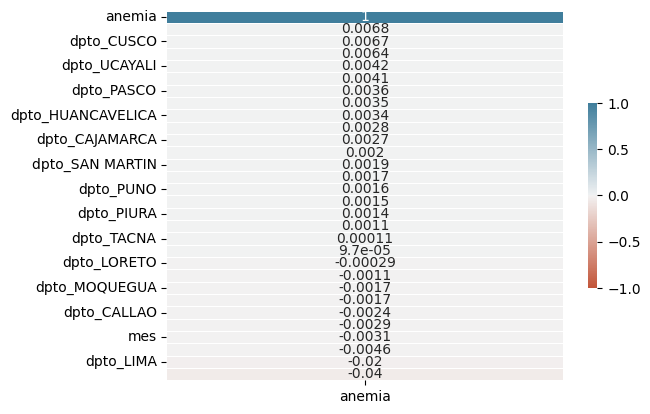

In [47]:

sns.heatmap(
    data=corr_anemia.sort_values(ascending=False).to_frame(),
    cmap=sns.diverging_palette(20, 230, as_cmap=True),
    center=0,
    vmin=-1,
    vmax=1,
    linewidths=0.5,
    cbar_kws={"shrink": 0.5},
    annot=True
)

##4. ESCALAMIENTO

Separando las variables numericas

In [78]:
onehot_encoded_columns = [col for col in data_transformed_df.columns if col.startswith('sexo_') or col.startswith('dpto_')]
numerical_features = ['mes', 'edad']

Aplicando el escalamiento

In [79]:
scaler = sklearn.preprocessing.StandardScaler()
data_transformed_df[numerical_features] = scaler.fit_transform(data_transformed_df[numerical_features])
data_transformed_df

,mes,sexo_F,sexo_M,dpto_AMAZONAS,dpto_ANCASH,dpto_APURIMAC,dpto_AREQUIPA,dpto_AYACUCHO,dpto_CAJAMARCA,dpto_CALLAO,...,dpto_MOQUEGUA,dpto_PASCO,dpto_PIURA,dpto_PUNO,dpto_SAN MARTIN,dpto_TACNA,dpto_TUMBES,dpto_UCAYALI,edad,anemia
0,1.434531,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951097,1.0
1,1.434531,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951097,1.0
2,-0.306583,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.487332,1.0
3,-1.177140,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.023568,1.0
4,1.434531,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.951097,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1297815,0.563974,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.878626,1.0
1297816,-1.177140,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,3.269920,1.0
1297817,-0.886954,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440197,1.0
1297818,-0.596768,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,-0.440197,1.0


In [81]:
#data_transformed_df

In [82]:
print(data_transformed_df['anemia'].value_counts())

anemia
1.0    1294978
0.0       2842
Name: count, dtype: int64


##4. REGRESION LOGISTICA

In [83]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [84]:
X = data_transformed_df.drop('anemia', axis=1)
y = data_transformed_df['anemia']

Entrenamiento del modelo

In [85]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

LogisticRegression(max_iter=1000)

Prediccion y evaluacion del modelo

In [87]:
y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f'Accuracy : {accuracy}')
#print(classification_report(y_test, y_pred))
#print(confusion_matrix(y_test, y_pred))

Accuracy : 0.9977385153565209


Matriz de confusion

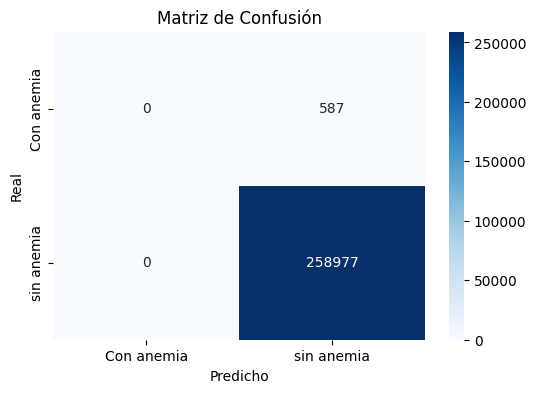

In [88]:
conf_matrix = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Con anemia', 'sin anemia'], yticklabels=['Con anemia', 'sin anemia'])
plt.xlabel('Predicho')
plt.ylabel('Real')
plt.title('Matriz de Confusión')
plt.show()

##5. ARBOL DE DECISION

In [90]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=00000)
tree1 = DecisionTreeClassifier(random_state=42)
tree1.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9978386833305081


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2732: UserWarning: X has feature names, but LogisticRegression was fitted without feature names
  warnings.warn(


In [91]:
from sklearn.model_selection import GridSearchCV

# definirmos varios parametros
param_grid = {
    'max_depth': [3,4,10],
    'min_samples_split':[2,5,10],
    'min_samples_leaf':[1,2,4],
    'criterion':['gini','entropy']
}

clf = DecisionTreeClassifier(random_state=42)

grid_search = GridSearchCV(clf,param_grid,cv=5,scoring='accuracy',n_jobs=-1)
grid_search.fit(X_train,y_train)

print("Mejores parametros : ",grid_search.best_params_)

Mejores parametros :  {'criterion': 'gini', 'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}


In [92]:
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)
accuracy = accuracy_score(y_test,y_pred)
print(f'Accuracy best model : {accuracy}')

Accuracy best model : 0.9978386833305081


<ipython-input-94-4b1e45e671c8>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=columns,y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)


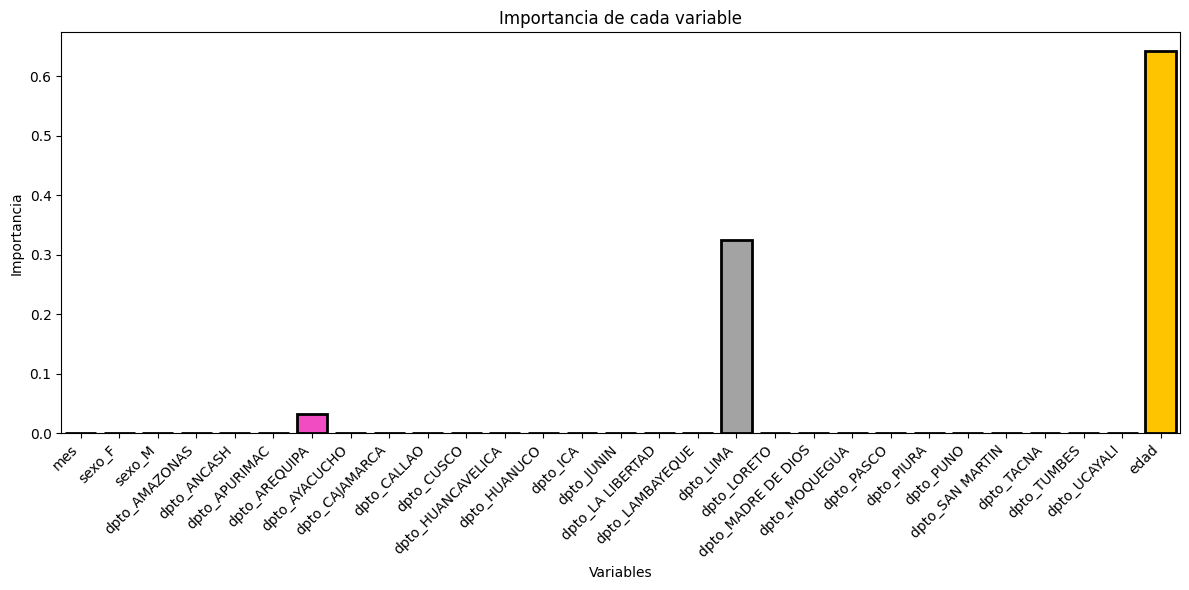

In [94]:
importances = best_model.feature_importances_
columns = X.columns
plt.figure(figsize=(12,6))
sns.barplot(x=columns,y=importances,palette='bright',saturation= 2.0,edgecolor='black',linewidth=2)
plt.title('Importancia de cada variable')
plt.xticks(rotation=45, ha="right")
plt.xlabel('Variables')
plt.ylabel('Importancia')
plt.tight_layout()
plt.show()

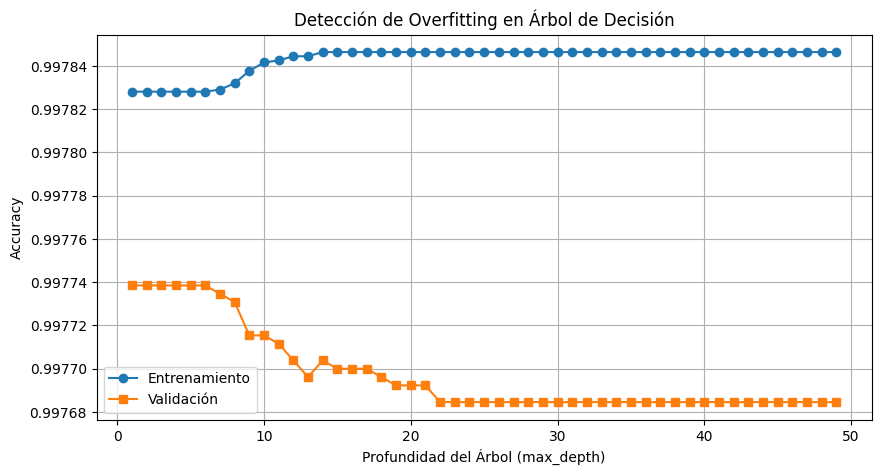

In [95]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import train_test_split

# Datos (usamos X, y de tu dataset)
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

train_scores = []
val_scores = []
max_depths = range(1, 50)  # Profundidades de 1 a 20

for depth in max_depths:
    model = DecisionTreeClassifier(max_depth=depth, random_state=42)
    model.fit(X_train, y_train)

    # Evaluamos en los conjuntos de entrenamiento y validación
    train_acc = accuracy_score(y_train, model.predict(X_train))
    val_acc = accuracy_score(y_val, model.predict(X_val))

    train_scores.append(train_acc)
    val_scores.append(val_acc)

# Graficamos las curvas de accuracy
plt.figure(figsize=(10, 5))
plt.plot(max_depths, train_scores, label="Entrenamiento", marker='o')
plt.plot(max_depths, val_scores, label="Validación", marker='s')
plt.xlabel("Profundidad del Árbol (max_depth)")
plt.ylabel("Accuracy")
plt.title("Detección de Overfitting en Árbol de Decisión")
plt.legend()
plt.grid(True)
plt.show()

##6. RANDOM FOREST

In [ ]:
model = RandomForestClassifier(random_state=42)
model.fit(X_train, y_train)

y_pred = model.predict(X_test)

accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy}")

Accuracy: 0.9977269575133686
              precision    recall  f1-score   support

         0.0       0.00      0.00      0.00       587
         1.0       1.00      1.00      1.00    258977

    accuracy                           1.00    259564
   macro avg       0.50      0.50      0.50    259564
weighted avg       1.00      1.00      1.00    259564

[[     0    587]
 [     3 258974]]
